# Learning Objectives:

### - Create SQL DBs and populate them using Python

### - Interact with SQL DBs using Python and Pandas

### - Understand Joins Using SQL

--------------------------------------

### In order to run SQL scripts from Python we are going to need a few things.
#### - SQL Database.
#### - Established connection.
#### - Familiarity with "How to SQL."

------

### The sqlite3 package

The command line utility can be useful for basic SQL tasks, but since we're using Python for the rest of code it will often be easier to access sqlite directly from within Python. We can use the Python sqlite3 package for just this purpose.

Open a connection to an SQLite database file. As before, if the file does not already exist it will automatically be created.

If you want to see your data in SQL DB form you can download a SQLite Manager.

You can download a very limited trial version here: http://www.sqlabs.com/sqlitemanager.php



In [2]:
!pwd

/Users/nicholasbeaudoin/Desktop/GA/Extra meterials/18a-SQL/code/starter-code


In [3]:
import sqlite3

# Establishing our Database path.  If no database exists here, this will create one.
sqlite_db = '../../DB/test_db.sqlite'

# Establishing the SQL Connection to our Database.  
conn = sqlite3.connect(sqlite_db)

c = conn.cursor()
# Cursor objects allow you to keep track of which result set is which, 
# since it's possible to run multiple queries before you're done fetching the results of the first.
# CURSORS seem to be a tool for iterating over tables row-by-row
# This is a conceptual SQL object that is hard to give a very clear consise definition of.

The syntax to create a table is similar to the console, only now we use the execute method of the cursor object c that we just created:

In [4]:
# We can use the 'execute' function on our Database Connection (With Cursor) to execute a SQL Query.
c.execute('CREATE TABLE houses (field1 INTEGER PRIMARY KEY, sqft INTEGER, bdrms INTEGER, age INTEGER, price INTEGER);')

# sqlite.connect('data/sql/test_db.sqlite').cursor().execute()

# Save (commit) the changes (Just like GitHub)
conn.commit()

OperationalError: table houses already exists

With the database saved the table should now be viewable using SQLite Manager.

### Adding data

Since we're back in python, we can now use regular programming techniques in conjunction with the sqlite connection. In particular, the cursor's execute() method supports value substitution using the ? character, which makes adding multiple records a bit easier. Check out documentation for more details.

In [ ]:
# We can create a tuple
last_sale = (None, 4000, 5, 22, 619000)

# We can insert said tuple into the database table using character substitution.
c.execute('INSERT INTO houses VALUES (?, ?, ?, ?, ?)', last_sale)
# c.execute('INSERT INTO houses VALUES (None, 4000, 5, 22, 619000)') ## this is the same!

# Remember to commit the changes
conn.commit()

Notice that in this syntax we use the python None value, rather than NULL, to trigger SQLite to auto-increment the Primary Key.

There is a related cursor method executemany() which takes an array of tuples and loops through them, substituting one tuple at a time.

In [ ]:
# We can use the same logic to insert a whole list of tuples!
# Tell me thats not helpful!
recent_sales = [
  (None, 2390, 4, 34, 319000),
  (None, 1870, 3, 14, 289000),
  (None, 1505, 3, 90, 269000),
]

c.executemany('INSERT INTO houses VALUES (?, ?, ?, ?, ?)', recent_sales)

# c.execute('DELETE FROM houses WHERE rowid > 8')

conn.commit()

# Pandas and SQL

#### Pandas connector

While databases provide many analytical capabilities, often it's useful to pull the data back into Python for it's more flexible programming operations. Large, fixed operations would be more efficient in a database, but Pandas allows for interactive processing.

For example, if you want to aggregate nightly log-ins or sales to present a report or dashboard, this operation is likely not changing and operating on a large dataset. This can run very efficiently in a database rather than by connecting to it with Python.

However, if we want to investigate login or sales data further and ask more interactive questions, then Python would be more practical.

## Pandas Functions for SQL

#### read_sql_table(table_name, con[, schema, ...])
    - Read SQL database table into a DataFrame.
#### read_sql_query(sql, con[, index_col, ...])
    - Read SQL query into a DataFrame.
#### read_sql(sql, con[, index_col, ...])
    - Read SQL query or database table into a DataFrame.
    - a convenience wrapper around read_sql_table() and read_sql_query()
    - will delegate to specific function depending on the provided input
#### DataFrame.to_sql(name, con[, flavor, ...])
    - Write records stored in a DataFrame to a SQL database.

#  Create a SQL DB and tables using Pandas DFs and CSVs

First we will need to read our CSV files into Python before we can use Python to convert it to a SQL style dataframe

In [ ]:
ls

In [ ]:
!pwd

In [2]:
import pandas as pd
from pandas.io import sql

cars = pd.read_csv('../../data/cars.csv', encoding = 'utf-8')
# If you don't specify the type encoding as 'utf-8' you're going to have a bad time when you try to convert to SQL


In [3]:
# Checking what our dataframe looks like
cars.head(3)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


In [6]:
# Checking for nulls in our data
cars.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

In [7]:
# Import Sqlite3 Library
import sqlite3

# Establishing the Connection to our Database.  If no database exists here, this will create one.
connection = sqlite3.connect('../../DB/Cars.db.sqlite')

# Keep in mind the directory your notebook is open in is the base directory for all of our SQL actions from here.

#### If you check that directory now you should see an 'Cars.db' sql file.

In [8]:
# Converts a DataFrame into a table within a SQL database
cars.to_sql(name = 'cars', con = connection, if_exists = 'replace', index = False)

# name = name of the table useful if you have multiple tables in a SQL database
# con = the connection path to where the data should be placed
# if_exists = condition to pass if the table already exists.

#### Using the below will allow you to acess a database store in memory(RAM) as opposed to in Storage, if you wanted a temporary SQL database

``` python
conn = sqlite3.connect(':memory:')
```

In [ ]:
!pwd

In [ ]:
# When reading in data to a SQL DB from pandas, how to specify a Key in the table.

# Connect to SQL DB and read SQL tables into Pandas DFs
#### (Also, return to SQL DataFrames modified tables)

In [9]:
#The SQL Sub-library from Pandas will allow us to run SQL queries within python.
from pandas.io import sql
# We already imported sqlite3, but it will also be needed for reading in SQL 
import sqlite3

# Specifying the SQL Path to the SQL Database
connection = sqlite3.connect('../../DB/Cars.db.sqlite')

# This is our SQL Query
query = 'select "mpg", "cyl" from cars WHERE "model" == "Datsun 710"'

# Using the read_sql from the Pandas SQL library and setting it equal to a DF object.
cars = sql.read_sql(query, con = connection)

cars.head(20)

,mpg,cyl
0,22.8,4


In [ ]:
# Can you run a seperate query to select new variables?

#  Run SQL Queries using Pandas

In [ ]:
sql.read_sql('select * from cars', connection).head()

#sql = Our SQL query as a string
#con = is the connection path to our SQL Database

In [10]:
sql.read_sql('SELECT * FROM cars LIMIT 5', connection)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
# Figure out how to read all the table names in a connection.

In [11]:
sql.read_sql('SELECT * FROM sqlite_master', connection)

,type,name,tbl_name,rootpage,sql
0,table,cars,cars,2,"CREATE TABLE ""cars"" (\n""model"" TEXT,\n ""mpg"" ..."


# 4. Review Joins

## Normalized and Denormalized Databases

There are several ways to organize data in a relational database. Two common definitions for data setups are: normalized and denormalized.

__Normalized__ structures have a single table per entity, and use many foreign keys or link tables to connect the entities.

__Denormalized__ tables have fewer tables and may (for example) place all of the tweets and the information on users in one table.

Each style has advantages and disadvantages. Denormalized tables duplicate a lot of information. For example, in a combined tweets/users table, we may store the address of each user. Now instead of storing this once per user, we are storing this once per tweet!

However, this makes the data easy to access if we ever need to find the tweet along with the user's location.

Normalized tables save the storage space by separating the information. However, if we ever need to access those two pieces of information, we would need to join the two tables, which can be a fairly slow operation.

## Join Types

SQL joins are used when data is spread in different tables. A join operation allows to combine rows from two or more tables in a single new table. In order for this to be possible, a common field between the tables need to exist.

Join operations can be thought of as operations between two sets, where records with the same key are combined and records missing in one set are either discarded or included as NULL values.

_CHECK: _
- _Where have you encountered a similar functionality in Pandas?_
- _Can you make a couple of examples of how you used that Pandas function in the past?_

Join Types:
- INNER JOIN: Returns all rows when there is at least one match in BOTH tables
- LEFT JOIN: Return all rows from the left table, and the matched rows from the right table
- RIGHT JOIN: Return all rows from the right table, and the matched rows from the left table
- FULL JOIN: Return all rows when there is a match in ONE of the tables

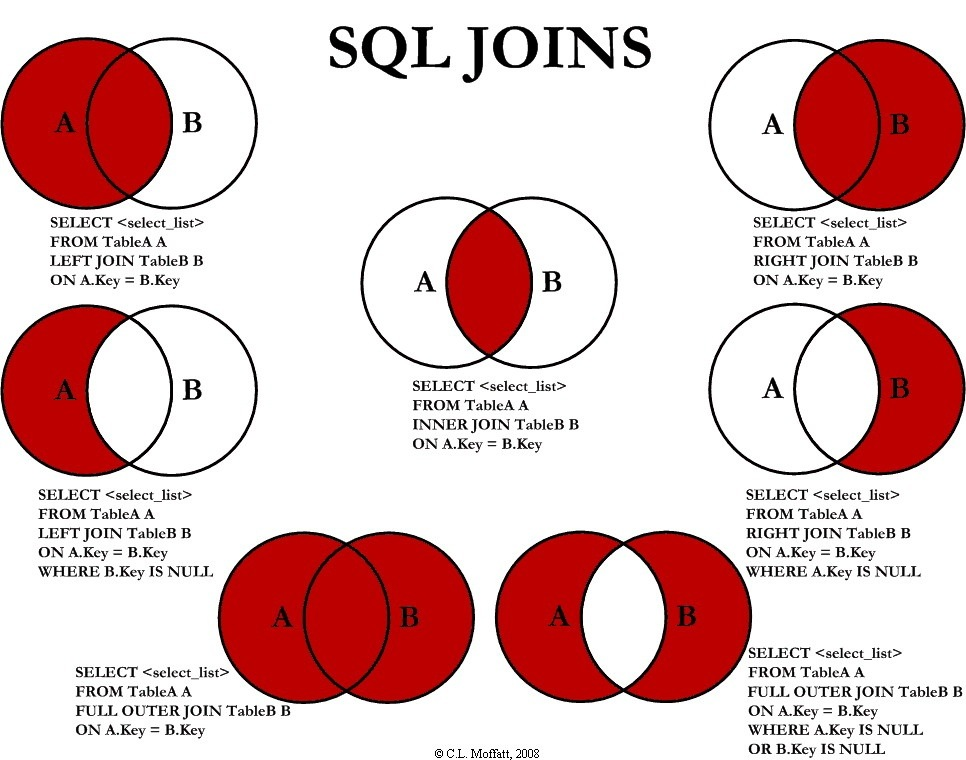

In [12]:
from IPython.display import Image
Image("../images/sql-joins.jpeg")

In [13]:
# In the case that typing out sql.read_sql() is a little too much,
# we'll create a function shortcut.


CARS = sqlite3.connect('../../DB/Cars.db.sqlite')


def Q(query, db=CARS):
    return sql.read_sql(query, db)

In [14]:
Q('select * from CARS limit 5')

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [15]:
new_car = ('Tesla', None, 6, 160, 110, 4, 3, 15, 1, 1, 3, 4)
CARS.execute('INSERT INTO cars VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)',new_car)
CARS.commit()

In [16]:
Q('SELECT * FROM cars WHERE cars."Model" = "Tesla"')

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Tesla,None,6,160.0,110,4.0,3.0,15.0,1,1,3,4


In [ ]:
# Do research about a Ferrari model and add it to the database

In [ ]:
Q('select * from cars limit 5')